# Proyek Analisis Data

Aurelia Priscilia Simamora - Bike Sharing Dataset

## Pertanyaan Bisnis

1. Pada jam berapa jumlah penyewaan sepeda mencapai puncak tertinggi dan terendah? <br>
2. Pada musim apa permintaan penyewaan sepeda mencapai puncak terendah? <br>
3. Berapa perbandingan pelanggan yang memilih sewa registered dibandingkan dengan sewa casual?<br>

## Menyiapkan library yang dibutuhkan

In [29]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [30]:
# Menampilkan tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
# Menampilkan tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [32]:
# Menampilkan informasi tipe data dari setiap kolom
print("Informasi tipe data kolom dalam hour_df:")
hour_df_types = hour_df.dtypes
print(hour_df_types)

print("\nInformasi tipe data kolom dalam day_df:")
day_df_types = day_df.dtypes
print(day_df_types)

Informasi tipe data kolom dalam hour_df:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Informasi tipe data kolom dalam day_df:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


## Memeriksa duplikasi data

In [33]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Hasilnya, tidak terdapat data yang terduplikat

## Memeriksa missing value

In [34]:
# Memeriksa keberadaan missing value di dataset day
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
# Memeriksa keberadaan missing value di dataset hour
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasilnya, tidak ada missing value

## Memeriksa nilai statistik

In [36]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [37]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat dilihat tidak ada keanehan pada nilai statistik kedua data

### Cleaning Data

1. Menghapus tabel yang tidak diperlukan (drop)

Menghapus kolom instant yang tidak memberikan informasi berguna, kolom windspeed yang tidak dipakai di pertanyaan bisnis, dan workingday yang sama dengan kolom weekday

In [38]:
drop_col = ['instant', 'windspeed', 'workingday']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,82,1518,1600


In [39]:
drop_col = [ 'windspeed', 'workingday']

for i in day_df.columns:
  if i in drop_col:
    hour_df.drop(labels=i, axis=1, inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengubah Tipe Data

1. int ke object

In [40]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

day_df[columns] = day_df[columns].apply(lambda x: x.astype('category'))
hour_df[columns] = hour_df[columns].apply(lambda x: x.astype('category'))


2. object ke datetime

In [41]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Rename

##### Mengganti nama kolom agar lebih mudah dibaca di dataset day_df

In [42]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day
day_df.rename(columns=
              {'dteday': 'dateday',
               'yr':'year',
               'mnth':'month',
               'weathersit':'weather_condition', 
               'cnt':'count_cr',
               'hum':'humidity'
              },inplace=True)
day_df.head()

,dateday,season,year,month,holiday,weekday,weather_condition,temp,atemp,humidity,casual,registered,count_cr
0,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,82,1518,1600


In [43]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour
hour_df.rename(columns={'dteday': 'dateday',
                        'yr':'year',
                        'hr':'hours',
                        'mnth':'month',
                        'weathersit':'weather_condition',
                        'cnt':'count_cr',
                        'hum':'humidity'
                       },inplace=True)
hour_df.head()

,instant,dateday,season,year,month,hours,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count_cr
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengubah angka menjadi keterangan pada kolom agar mudah dipahami

In [44]:
# konversi season
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})


# konversi year 
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})
hour_df['year'] = hour_df['year'].map({
    0: '2011', 1: '2012'
})

# konversi month
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})


# konversi weather_condition 
day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Clear', 2:'Misty', 3:'Light_rainsnow', 4:'Heavy_rainsnow'
})
hour_df['weather_condition'] = hour_df['weather_condition'].map({
    1: 'Clear', 2:'Misty', 3:'Light_rainsnow', 4:'Heavy_rainsnow'
})    
    
    
# konversi one_of_week
day_df['one_of_week'] = day_df['weather_condition'].map({
    0: 'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'
})
hour_df['one_of_week'] = hour_df['weather_condition'].map({
    0: 'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'
})


# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


#### Membuat kolom baru

Kategori apakah weekend atau weekdays, dan classify humidity

In [45]:
# Membuat kolom baru bernama category_days
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_of_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

day_df["category_of_days"] = day_df["one_of_week"].apply(get_category_of_days)
hour_df["category_of_days"] = hour_df["one_of_week"].apply(get_category_of_days)

In [46]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

day_df["category_of_humidity"] = day_df["humidity"].apply(classify_humidity)
hour_df["category_of_humidity"] = hour_df["humidity"].apply(classify_humidity)

## Exploratory Data Analysis (EDA)

### Explore Data hour_df


In [47]:
# Menampilkan rangkuman statistik dari data di DataFrame hour_df
summary_stats = hour_df.describe(include="all")
print(summary_stats)

           instant              dateday season   year  month         hours  \
count   17379.0000                17379  17379  17379  17379  17379.000000   
unique         NaN                  731      4      2     12           NaN   
top            NaN  2011-01-01 00:00:00   Fall   2012    May           NaN   
freq           NaN                   24   4496   8734   1488           NaN   
first          NaN  2011-01-01 00:00:00    NaN    NaN    NaN           NaN   
last           NaN  2012-12-31 00:00:00    NaN    NaN    NaN           NaN   
mean     8690.0000                  NaN    NaN    NaN    NaN     11.546752   
std      5017.0295                  NaN    NaN    NaN    NaN      6.914405   
min         1.0000                  NaN    NaN    NaN    NaN      0.000000   
25%      4345.5000                  NaN    NaN    NaN    NaN      6.000000   
50%      8690.0000                  NaN    NaN    NaN    NaN     12.000000   
75%     13034.5000                  NaN    NaN    NaN    NaN    

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_9628\2061158386.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = hour_df.describe(include="all")


Menurut ringkasan statistik tersebut, jumlah pelanggan adalah 17379. Rentang waktu yang ditampilkan dari jam 00.00 hingga 23.59 menunjukkan bahwa rata-rata peminjaman sepeda terjadi pada pukul 11.54 dengan standar deviasi sebesar 6.91.

In [48]:
#sewa berdasarkan jam
hour_df.groupby(by="hours")["count_cr"].sum()

hours
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: count_cr, dtype: int64

Dapat disimpulkan bahwa jumlah penyewaan sepeda terbanyak terjadi pada pukul 17.00, sementara jumlah penyewaan paling sedikit terjadi pada pukul 04.00.

### Explore Data day_df


In [49]:
# Menampilkan rangkuman statistik dari data di DataFrame hour_df
summary_stats = day_df.describe(include="all")
print(summary_stats)


                    dateday season  year month  holiday  weekday  \
count                   731    731   731   731    731.0    731.0   
unique                  731      4     2    12      2.0      7.0   
top     2011-01-01 00:00:00   Fall  2012   Jan      0.0      0.0   
freq                      1    188   366    62    710.0    105.0   
first   2011-01-01 00:00:00    NaN   NaN   NaN      NaN      NaN   
last    2012-12-31 00:00:00    NaN   NaN   NaN      NaN      NaN   
mean                    NaN    NaN   NaN   NaN      NaN      NaN   
std                     NaN    NaN   NaN   NaN      NaN      NaN   
min                     NaN    NaN   NaN   NaN      NaN      NaN   
25%                     NaN    NaN   NaN   NaN      NaN      NaN   
50%                     NaN    NaN   NaN   NaN      NaN      NaN   
75%                     NaN    NaN   NaN   NaN      NaN      NaN   
max                     NaN    NaN   NaN   NaN      NaN      NaN   

       weather_condition        temp       atem

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_9628\3032808798.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = day_df.describe(include="all")


Dari analisis statistik di atas, kita mendapatkan bahwa jumlah pelanggan sebanyak 17379 orang pada musim 1 - 4 memiliki puncaknya.

In [50]:
# Jumlah penyewaan tiap season 

day_df.groupby(by="season")["count_cr"].sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Hasilnya, season dengan penyewaan terbanyak adalah Fall


In [51]:
#Jumlah penyewaan tiap tahun pelanggan registered dan casual

day_df.groupby(by="year").agg({
    "registered": sum,
    "casual": sum
})

,registered,casual
year,,
2011,995851,247252
2012,1676811,372765


Hasilnya, terdapat perbedaan yang signifikan antara individu yang sudah menjadi anggota dengan yang belum menjadi anggota. Pada tahun 2011, jumlah individu yang telah menjadi anggota adalah 995.851, sedangkan yang belum menjadi anggota hanya sebanyak 247.252.

## Visualization & Explanatory Analysis

1. Pada jam berapa jumlah penyewaan sepeda mencapai puncak tertinggi dan terendah? <br>
2. Pada musim apa permintaan penyewaan sepeda mencapai puncak tertinggi?
3. Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?
4. Berapa banyak pelanggan yang memilih sewa registered dibandingkan dengan sewa casual?<br>

### Pertanyaan 1: Pada jam berapa jumlah penyewaan sepeda mencapai puncak tertinggi dan terendah?

In [52]:
sum_order_items_df = hour_df.groupby("hours")["count_cr"].sum().sort_values(ascending=False).reset_index()

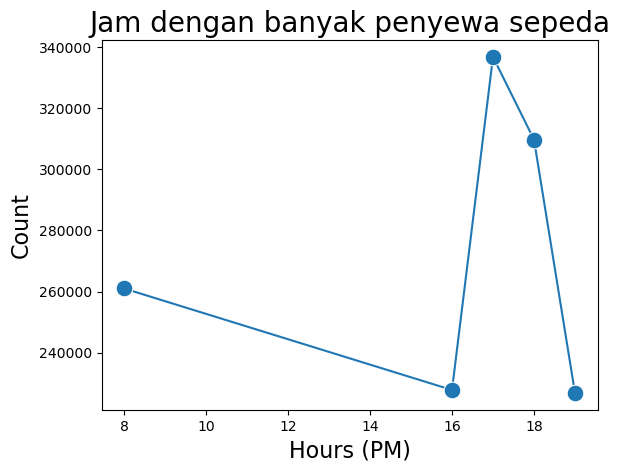

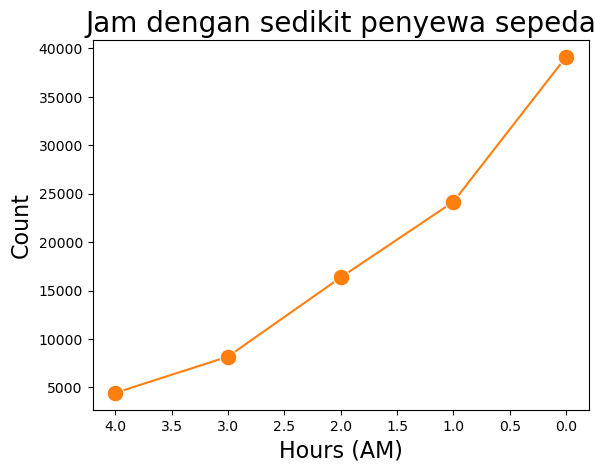

In [53]:
# Membuat line plot untuk penyewa sepeda terbanyak
sns.lineplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), marker='o', markersize=12, color='#1f77b4')

# Mengatur label dan judul
plt.xlabel("Hours (PM)", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Jam dengan banyak penyewa sepeda", fontsize=20)

# Menampilkan plot
plt.show()

# Membuat line plot untuk penyewa sepeda terdikit
sns.lineplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), marker='o', markersize=12, color='#ff7f0e')

# Mengatur label dan judul
plt.xlabel("Hours (AM)", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Jam dengan sedikit penyewa sepeda", fontsize=20)

# Menampilkan plot
plt.gca().invert_xaxis()
plt.show()


Dari gambar di atas dapat dilihat, penyewaan sepeda terbanyak pada jam 17.00 dan yang sedikit pada jam 04.00.

### Pertanyaan 2: ada musim apa permintaan penyewaan sepeda mencapai puncak terendah?

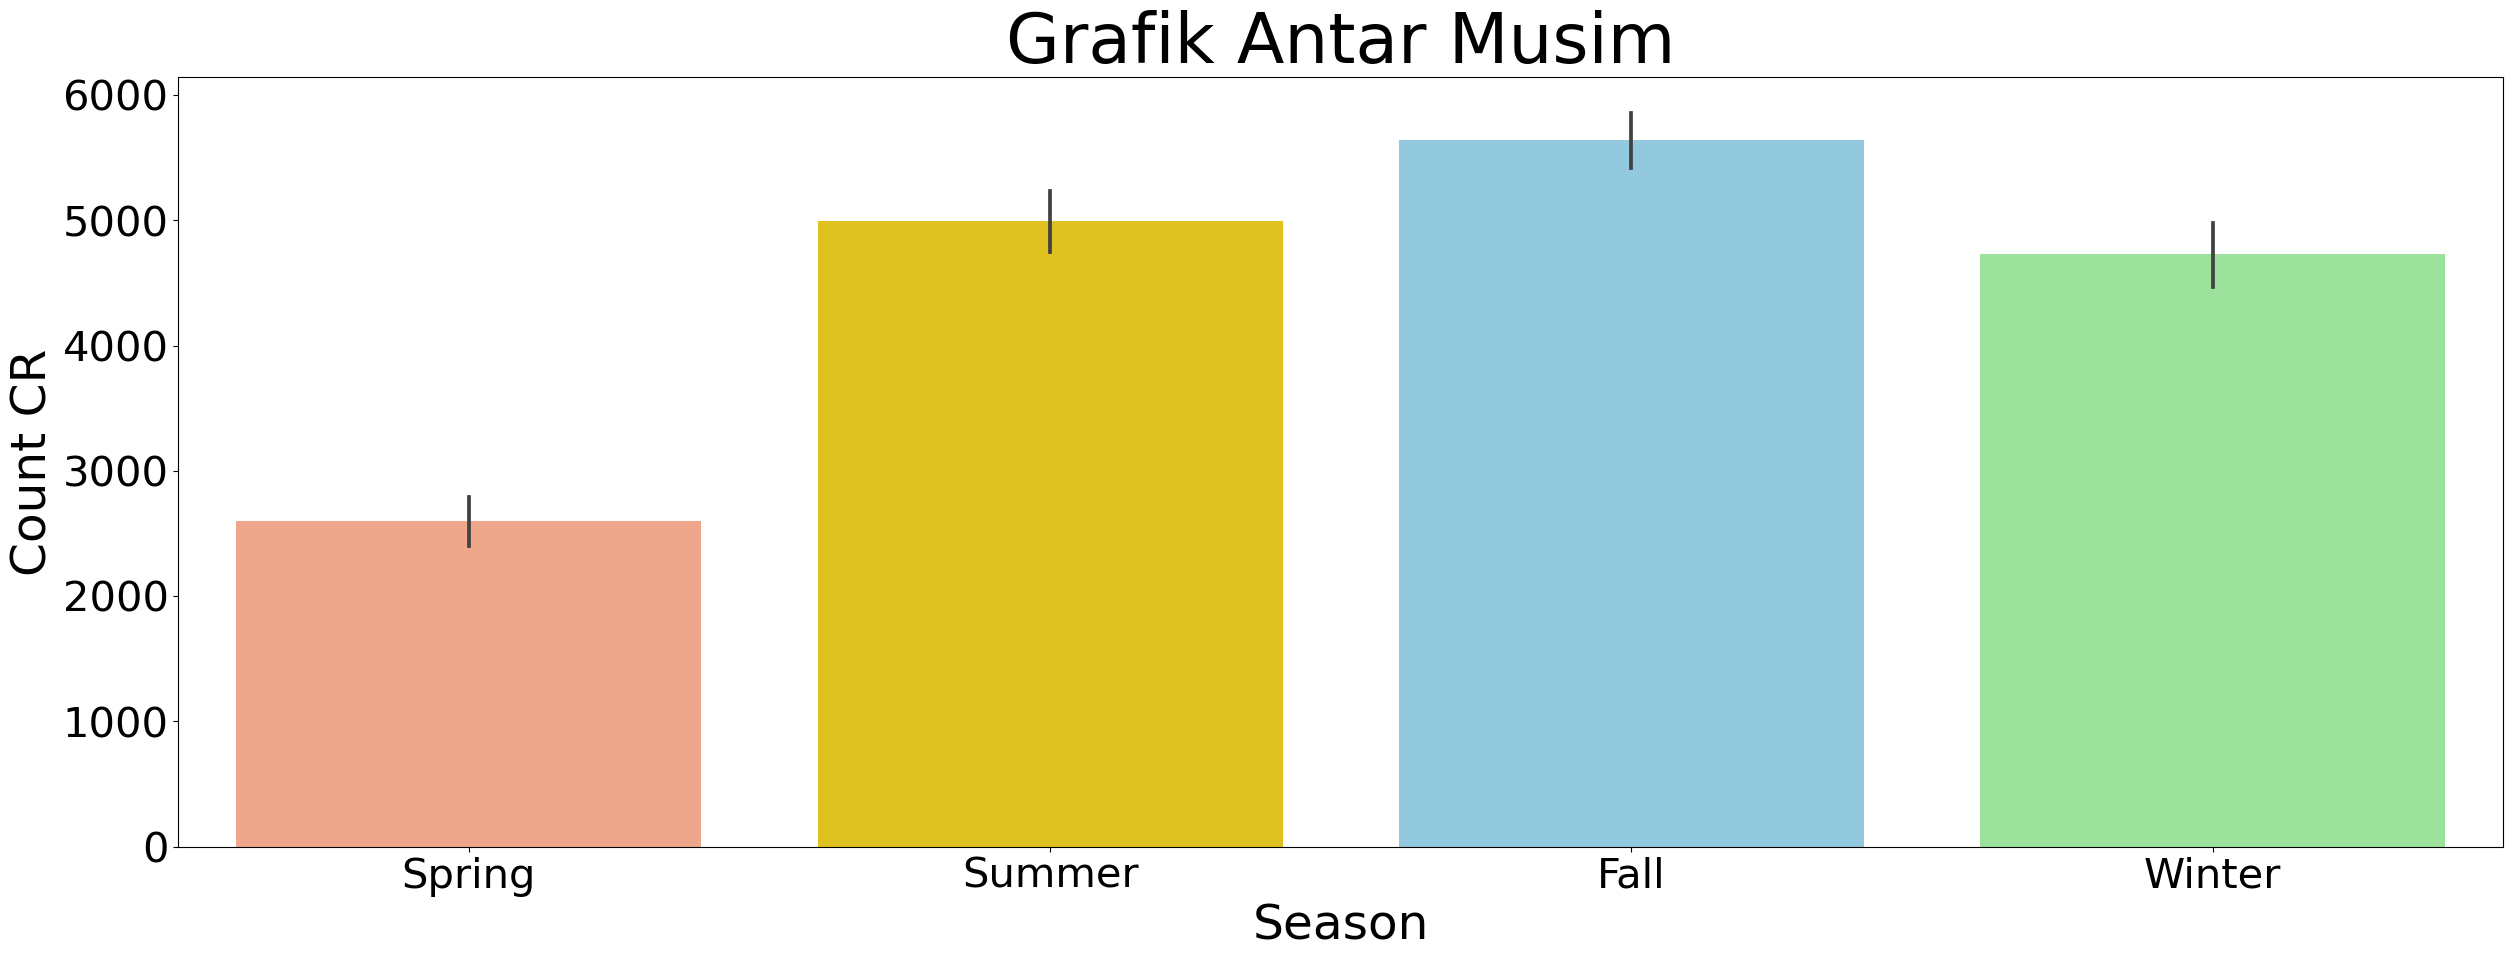

In [57]:
# Mengatur warna
colors = ["#FFA07A", "#FFD700", "#87CEEB", "#90EE90"]

# Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(30, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr", 
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )

# Mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel("Count CR", fontsize=35)
ax.set_xlabel("Season", fontsize=35)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.show()



Dapat dilihat, spring merupakan musim dengan penyewaan terendah/ paling sedikit.

### Pertanyaan 3: Berapa perbandingan pelanggan yang memilih sewa registered dibandingkan dengan sewa casual?



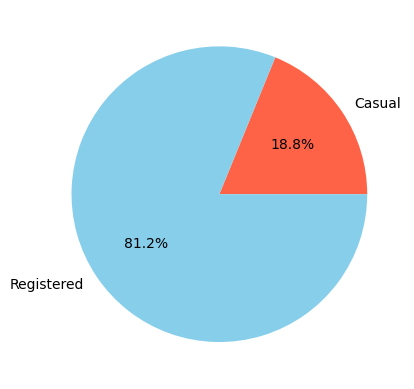

In [55]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['#FF6347', '#87CEEB'])

# Menampilkan pie plot
plt.show()

Dari gambar tersebut dapat disimpulkan, terdapat perbandingan pelanggan yakni 81.2% yang registered dan 18.8% yang casual.

## Conclusion

- Pertanyaan 1: Dari gambar, dapat dilihat penyewaan sepeda terbanyak pada jam 17.00 dan yang paling sedikit pada jam 04.00. 

- Pertanyaan 2: Musim dengan penyewaan sepeda paling rendah merupakan musim fall

- Pertanyaan 3: Untuk perbandingan antara pelanggan penyewa sepeda yang registered (terdaftar) dan casual (tidak) adalah 81.2% dan 18.8%

## Teknik analisis lanjutan

### RFM Analysis

Analisis RFM digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

- Terakhir Kali (Recency): Seberapa baru pelanggan berinteraksi dengan bisnis.
- Frekuensi (Frequency): Seberapa sering pelanggan berinteraksi.
- Moneter (Monetary): Seberapa banyak uang yang mereka habiskan.

In [56]:
current_date = max(hour_df['dateday'])
rfm_df = hour_df.groupby('registered').agg({
    'dateday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602
